In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

a = [[24, 2, 14, 15, 16]]
columns = ['母亲年龄', '教育程度', 'CBTS', 'EPDS', 'HADS']
df = pd.DataFrame(a, columns=columns)

# 打印DataFrame
df

,母亲年龄,教育程度,CBTS,EPDS,HADS
0,24,2,14,15,16


In [4]:
# 读取Excel数据
data = pd.read_excel('no_error.xlsx')

# 定义自变量X和因变量y
X = data[['母亲年龄','教育程度','CBTS', 'EPDS', 'HADS']]#'EPDS',
#X = data[['母亲年龄','CBTS', 'EPDS', 'HADS']]
y = data['婴儿行为特征']
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
mean=np.mean(X,axis=0)
X1=X-mean
std=np.std(X1,axis=0)
X_scaled=X1/std
# 添加截距项
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
# 建立多元回归模型
model = sm.OLS(y, X_poly).fit()
# 输出模型摘要
print(model.summary())
#预测部分
data1 = pd.read_excel('pred.xlsx')
# 定义自变量X和因变量y
X_test = data1[['母亲年龄','教育程度','CBTS',  'EPDS','HADS']]#
X_test=X_test-mean
X_test=X_test/std
X_test_poly = poly.fit_transform(X_test)
# 预测
y_pred = model.predict(X_test_poly)
print(y_pred)
# 输出模型摘要
#print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 婴儿行为特征   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              23.46
Date:                Sun, 06 Aug 2023   Prob (F-statistic):                    5.94e-84
Time:                        14:18:45   Log-Likelihood:                         -477.01
No. Observations:                 378   AIC:                                      1064.
Df Residuals:                     323   BIC:                                      1280.
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
k1 = (2812-200)/3
k2 = (1890-500)/2
k3 = (12500-300)/5
b1 = 200
b2 = 500
b3 = 300

In [23]:
def target_function(X1, X2, X3):
    return k1*abs(X1)+b1+k2*abs(X2)+b2+k3*abs(X3)+b3

In [25]:
target_function(-7,-8,-10)

37054.666666666664

In [6]:
a = [[24, 2, 11, 22, 17]]
columns = ['母亲年龄', '教育程度', 'CBTS', 'EPDS', 'HADS']
df = pd.DataFrame(a, columns=columns)
X = df[['母亲年龄','教育程度','CBTS',  'EPDS','HADS']]#
X = X - mean
X= X / std
    
X_poly = poly.fit_transform(X)
# 预测
y_pred = model.predict(X_poly)

In [7]:
y_pred

array([2.46542772])

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# 定义目标函数

a = [[24, 2, 15, 22, 18]]
columns = ['母亲年龄', '教育程度', 'CBTS', 'EPDS', 'HADS']
df = pd.DataFrame(a, columns=columns)

def target_function(X1, X2, X3, df):
    df["CBTS"] += X1
    df["EPDS"] += X2
    df["HADS"] += X3
    X = df[['母亲年龄','教育程度','CBTS',  'EPDS','HADS']]#
    X = X - mean
    X= X / std
    
    X_poly = poly.fit_transform(X)
    # 预测
    y_pred = model.predict(X_poly)
    
    if abs(y_pred - 1)<0.5:
        ss = 0
    else:
        ss = 1000000
    return k1*abs(X1)+b1+k2*abs(X2)+b2+k3*abs(X3)+b3+ss
    
# 模拟退火法函数
def simulated_annealing():
    CBTS = 15
    EPDS = 22
    HADS = 18
    # 初始解
    X1 = -0
    X2 = -0
    X3 = -0
    current_solution = (X1, X2, X3)
    current_fitness = target_function(X1, X2, X3, df)
 
    # 最优解
    best_solution = current_solution
    best_fitness = current_fitness
 
    # 初始温度和终止温度
    initial_temperature = 100
    final_temperature = 1
 
    # 退火率
    cooling_rate = 0.90
 
    # 记录适应度随迭代次数的变化
    fitness_evolution = []
 
    # 模拟退火过程
    while initial_temperature > final_temperature:
        for _ in range(200):
            # 生成新解
            new_X1 = np.clip(np.random.randint(current_solution[0]-2, current_solution[0]+1), -2, 1)
            new_X2 = np.clip(np.random.randint(current_solution[1]-2, current_solution[1]+1), -2, 1)
            new_X3 = np.clip(np.random.randint(current_solution[2]-2, current_solution[2]+1), -2, 1)
            new_solution = (new_X1, new_X2, new_X3)
            new_fitness = target_function(new_X1, new_X2, new_X3, df)
 
            # 计算适应度差值
            delta_fitness = new_fitness - current_fitness
 
            # 判断是否接受新解
            if delta_fitness < 0 or np.random.rand() < np.exp(-delta_fitness / initial_temperature):
                current_solution = new_solution
                current_fitness = new_fitness
 
            # 更新最优解
                if current_fitness < best_fitness:
                    best_solution = current_solution
                    best_fitness = current_fitness
 
        # 记录适应度随迭代次数的变化
        fitness_evolution.append(best_fitness)
 
        # 降低温度
        initial_temperature *= cooling_rate
 
    return best_solution, best_fitness, fitness_evolution
# 运行模拟退火法
best_solution, best_fitness, fitness_evolution = simulated_annealing()
# 输出结果
print("最小函数值：", best_fitness)
print("最优解：", best_solution)

最小函数值： 3440.0
最优解： (0, 0, -1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 定义目标函数

a = [[24, 2, 15, 22, 18]]
columns = ['母亲年龄', '教育程度', 'CBTS', 'EPDS', 'HADS']
df = pd.DataFrame(a, columns=columns)

def target_function(X1, X2, X3, df):
    df["CBTS"] += X1
    df["EPDS"] += X2
    df["HADS"] += X3
    X = df[['母亲年龄','教育程度','CBTS',  'EPDS','HADS']]#
    X = X - mean
    X= X / std
    
    X_poly = poly.fit_transform(X)
    # 预测
    y_pred = model.predict(X_poly)
    
    if abs(y_pred - 1)<0.5:
        ss = 0
        return k1*abs(X1)+b1+k2*abs(X2)+b2+k3*abs(X3)+b3+ss
    else:
        return 5000000
    
# 模拟退火法函数
def simulated_annealing():
    CBTS = 15
    EPDS = 22
    HADS = 18
    # 初始解
    X1 = 0
    X2 = 0
    X3 = 0
    current_solution = (X1, X2, X3)
    current_fitness = target_function(X1, X2, X3, df)
 
    # 最优解
    best_solution = current_solution
    best_fitness = current_fitness
 
    # 初始温度和终止温度
    initial_temperature = 100
    final_temperature = 1
 
    # 退火率
    cooling_rate = 0.95
 
    # 记录适应度随迭代次数的变化
    fitness_evolution = []
 
    # 模拟退火过程
    while initial_temperature > final_temperature:
        for _ in range(100):
            # 生成新解
            new_X1 = np.clip(np.random.randint(current_solution[0]-2, current_solution[0]+1), -10, 10)
            new_X2 = np.clip(np.random.randint(current_solution[1]-2, current_solution[1]+1), -10, 10)
            new_X3 = np.clip(np.random.randint(current_solution[2]-2, current_solution[2]+1), -10, 10)
            #if new_X1 > X1:
            #    new_X1 = 0
            #if new_X2 > X2:
            #    new_X2 = 0
            #if new_X3 > X3:
            #    new_X3 = 0
            new_solution = (new_X1, new_X2, new_X3)
            new_fitness = target_function(new_X1, new_X2, new_X3, df)
 
            # 计算适应度差值
            delta_fitness = new_fitness - current_fitness
 
            # 判断是否接受新解
            if delta_fitness < 0 or np.random.rand() < np.exp(-delta_fitness / initial_temperature):
                current_solution = new_solution
                current_fitness = new_fitness
 
            # 更新最优解
                if current_fitness < best_fitness:
                    best_solution = current_solution
                    best_fitness = current_fitness
 
        # 记录适应度随迭代次数的变化
        fitness_evolution.append(best_fitness)
 
        # 降低温度
        initial_temperature *= cooling_rate
 
    return best_solution, best_fitness, fitness_evolution
# 运行模拟退火法
best_solution, best_fitness, fitness_evolution = simulated_annealing()
# 输出结果
print("最小函数值：", best_fitness)
print("最优解：", best_solution)

NameError: name 'pd' is not defined

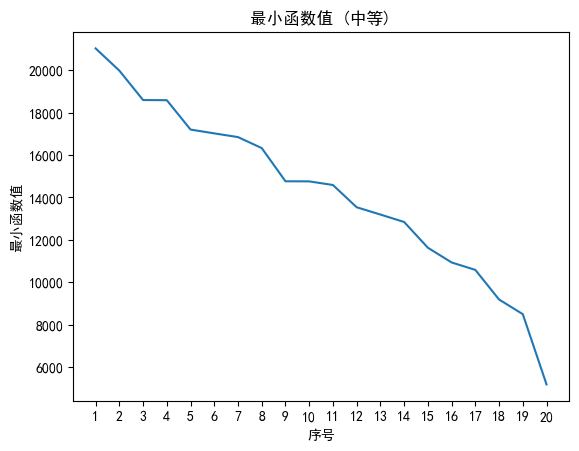

In [27]:
import matplotlib.pyplot as plt

# 最小函数值和最优解数据
data = [
    (14758.0, (-5, -3, -3)),
    (16328.0, (-4, -3, -4)),
    (19982.0, (-3, -6, -5)),
    (16847.0, (-3, -5, -4)),
    (13536.333333333332, (-2, -5, -3)),
    (10580.666666666666, (-1, -2, -3)),
    (17022.666666666664, (-4, -4, -4)),
    (14586.333333333332, (-2, -3, -4)),
    (18588.333333333332, (-5, -5, -4)),
    (12841.333333333332, (-2, -4, -3)),
    (11627.0, (-3, -1, -3)),
    (13192.666666666666, (-4, -2, -3)),
    (8492.0, (-3, 0, -2)),
    (21032.0, (-3, -4, -6)),
    (5177.666666666666, (-4, -1, 0)),
    (17202.0, (-3, -2, -5)),
    (10932.0, (-3, 0, -3)),
    (9183.333333333332, (-5, -2, -1)),
    (14762.0, (-3, -2, -4)),
    (18595.666666666668, (-1, -3, -6))
]

# 对最小函数值进行排序（从大到小）
data.sort(reverse=True, key=lambda x: x[0])

# 提取最小函数值和最优解
min_values = [item[0] for item in data]
opt_solutions = [item[1] for item in data]

# 绘制折线图
plt.plot(min_values)
plt.rcParams['font.sans-serif']=['SimHei']
plt.xlabel('序号')
plt.ylabel('最小函数值')
plt.title('最小函数值 (中等)')

# 设置x轴刻度显示格式
plt.xticks(np.arange(len(min_values)), np.arange(1, len(min_values)+1))
plt.savefig('2.png', dpi=300)
plt.show()

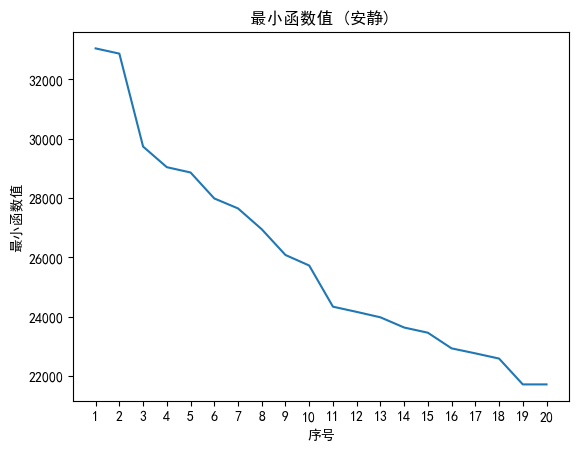

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 原始数据
data = [
    (29043.333333333332, (-5, -6, -8)),
    (23464.666666666664, (-7, -6, -5)),
    (22769.666666666664, (-7, -5, -5)),
    (32869.666666666664, (-7, -9, -8)),
    (27653.333333333332, (-5, -4, -8)),
    (25729.0, (-6, -7, -6)),
    (29738.333333333332, (-5, -7, -8)),
    (33045.33333333333, (-8, -8, -8)),
    (26084.0, (-6, -4, -7)),
    (26951.0, (-9, -5, -6)),
    (24167.0, (-3, -5, -7)),
    (24342.666666666664, (-4, -4, -7)),
    (23640.333333333332, (-8, -5, -5)),
    (27989.666666666664, (-7, -9, -6)),
    (23984.0, (-6, -8, -5)),
    (22594.0, (-6, -6, -5)),
    (22937.666666666664, (-4, -9, -5)),
    (28864.0, (-6, -8, -7)),
    (21723.333333333332, (-5, -6, -5)),
    (21723.333333333332, (-5, -6, -5))
]

# 对最小函数值进行排序（从大到小）
data.sort(reverse=True, key=lambda x: x[0])

# 提取最小函数值和最优解
min_values = [item[0] for item in data]
opt_solutions = [item[1] for item in data]

# 绘制折线图
plt.plot(min_values)
plt.rcParams['font.sans-serif']=['SimHei']
plt.xlabel('序号')
plt.ylabel('最小函数值')
plt.title('最小函数值 (安静)')

# 设置x轴刻度显示格式
plt.xticks(np.arange(len(min_values)), np.arange(1, len(min_values)+1))
plt.savefig('1.png', dpi=300)
plt.show()

D:\temp\ipykernel_15916\2544428839.py:46: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('optimal_solution_quiet.png', dpi=300)


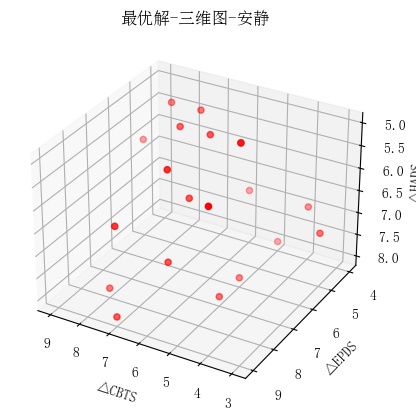

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'SimSun'
# 最优解数据
opt_solutions = [(-5, -6, -8),
                 (-7, -6, -5),
                 (-7, -5, -5),
                 (-7, -9, -8),
                 (-5, -4, -8),
                 (-6, -7, -6),
                 (-5, -7, -8),
                 (-8, -8, -8),
                 (-6, -4, -7),
                 (-9, -5, -6),
                 (-3, -5, -7),
                 (-4, -4, -7),
                 (-8, -5, -5),
                 (-7, -9, -6),
                 (-6, -8, -5),
                 (-6, -6, -5),
                 (-4, -9, -5),
                 (-6, -8, -7),
                 (-5, -6, -5),
                 (-5, -6, -5)]

# 提取 x, y, z 分量
X = [sol[0] for sol in opt_solutions]
Y = [sol[1] for sol in opt_solutions]
Z = [sol[2] for sol in opt_solutions]

# 创建 3D 图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(X, Y, Z, c='r', marker='o')

# 设置坐标轴标签
ax.set_xlabel('△CBTS')
ax.set_ylabel('△EPDS')
ax.set_zlabel('△HADS')

# 设置图形标题
ax.set_title('最优解-三维图-安静')
# 保存图形为图片文件
plt.savefig('optimal_solution_quiet.png', dpi=300)
# 显示图形
plt.show()

D:\temp\ipykernel_15916\452050076.py:48: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('optimal_solution.png', dpi=300)


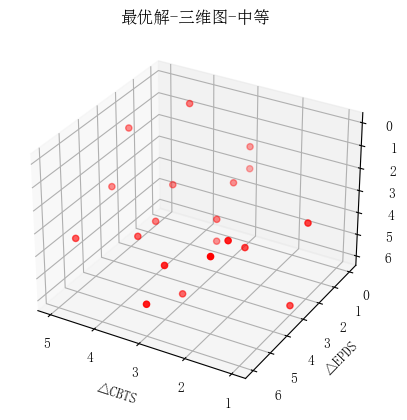

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.family'] = 'SimSun'

# 最优解数据
opt_solutions = [(-5, -3, -3),
                 (-4, -3, -4),
                 (-3, -6, -5),
                 (-3, -5, -4),
                 (-2, -5, -3),
                 (-1, -2, -3),
                 (-4, -4, -4),
                 (-2, -3, -4),
                 (-5, -5, -4),
                 (-2, -4, -3),
                 (-3, -1, -3),
                 (-4, -2, -3),
                 (-3, 0, -2),
                 (-3, -4, -6),
                 (-4, -1, 0),
                 (-3, -2, -5),
                 (-3, 0, -3),
                 (-5, -2, -1),
                 (-3, -2, -4),
                 (-1, -3, -6)]

# 提取 x, y, z 分量
X = [sol[0] for sol in opt_solutions]
Y = [sol[1] for sol in opt_solutions]
Z = [sol[2] for sol in opt_solutions]

# 创建 3D 图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(X, Y, Z, c='r', marker='o')

# 设置坐标轴标签
ax.set_xlabel('△CBTS')
ax.set_ylabel('△EPDS')
ax.set_zlabel('△HADS')

# 设置图形标题
ax.set_title('最优解-三维图-中等')
# 保存图形为图片文件
plt.savefig('optimal_solution.png', dpi=300)
# 显示图形
plt.show()